## 모델 저장과 복원
---
- 방법1) 모델 전체 저장(모델 구조 + 가중치 + 변수)
    * save_model()
    * 복원시 추가 작업 필요 없이 모델 파일 로딩해서 사용 가능
- 방법2) 가중치만 저장
    * save_weights()
    * 복원시 모델 구조(Architechture) 생성 후 가중치 적용
- 방법3) 모델 전체 또는 가중치 자동 저장
    * fit()에서 ModelCheckpoint Event에 대한 callback 등록
    * save_best_only = True => 모니터링 기준에 따라서 좋은 성능의 모델만 저장
    * save_weights_only = True => 가중치만 저장
- 파일 또는 폴더
    * 파일 확장자가 없으면 폴더로 저장
    * 파일 확장자
        - h5/hdf5 : HDF5 포맷으로 모델 또는 가중치 저장
        - ckpf : 체크포인트 파일 형태로 저장
        - pd : 모델 저장

### [1] 데이터 준비 및 로딩
---

In [95]:
from sklearn.datasets import load_iris
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras.models import save_model, load_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [10]:
iris=load_iris()

In [25]:
x_train=iris.data
y_train=iris.target

print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')

x_train.shape : (150, 4), y_train.shape : (150,)


꽃잎의 넓이

In [26]:
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

pteal length, petal width만

## [2] 데이터 전처리

In [27]:
# Feature => 꽃잎의 길이, 너비
x_train=x_train[:, 2:]
x_train.shape

(150, 2)

In [ ]:
# Target => 문자

In [28]:
ohe=OneHotEncoder()

In [32]:
y_train=y_train.reshape(-1, 1)

In [33]:
ohe.fit(y_train)

OneHotEncoder()

In [34]:
y_train=ohe.transform(y_train)

In [37]:
y_train.shape

(150, 3)

In [42]:
y_train=y_train.toarray()

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()
x_train_scaled=scaler.fit(x_train).transform(x_train)

In [40]:
x_train.shape, y_train.shape, y_train[0]

((150, 2),
 (150, 3),
 <1x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 1 stored elements in Compressed Sparse Row format>)

In [43]:
x_train, x_test, y_train, y_test=train_test_split(
x_train_scaled, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [44]:
x_train, x_val, y_train, y_val=train_test_split(
x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

## [3] 모델 구성 및 생성
---
- 입력 데이터 : 2개 Feature
- 출력 데이터 : 3개 품종
- 학습 방법 : 분류 - 다중분류

In [77]:
# W, b 초기값 고정
set_random_seed(11)

In [78]:
irisModel=Sequential(name='iris')

In [79]:
irisModel.add(Dense(10, activation='relu', input_shape=(2, )))
irisModel.add(Dense(30, activation='relu'))
irisModel.add(Dense(3, activation='softmax'))

In [80]:
irisModel.summary()

Model: "iris"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 30)                330       
                                                                 
 dense_11 (Dense)            (None, 3)                 93        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable params: 0
_________________________________________________________________


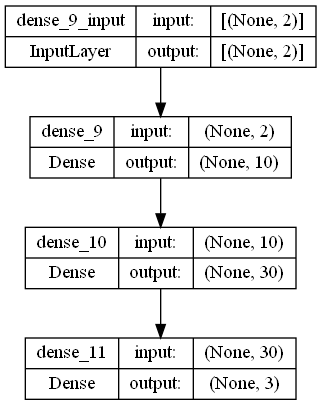

In [81]:
plot_model(irisModel, show_shapes=True)

In [82]:
irisModel.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')

In [83]:
his=irisModel.fit(x_train, y_train, epochs=100,
             validation_data=(x_val, y_val),
                 verbose=False)

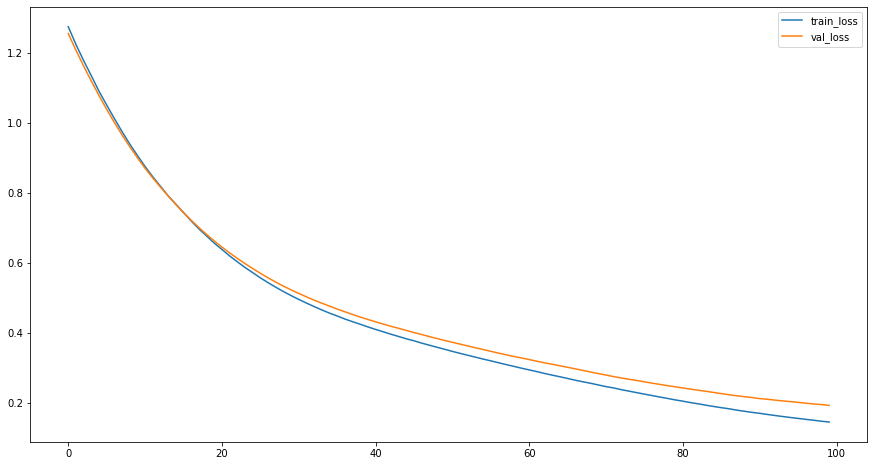

In [84]:
plt.figure(figsize=(15, 8))
plt.plot(his.epoch, his.history['loss'], label='train_loss')
plt.plot(his.epoch, his.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

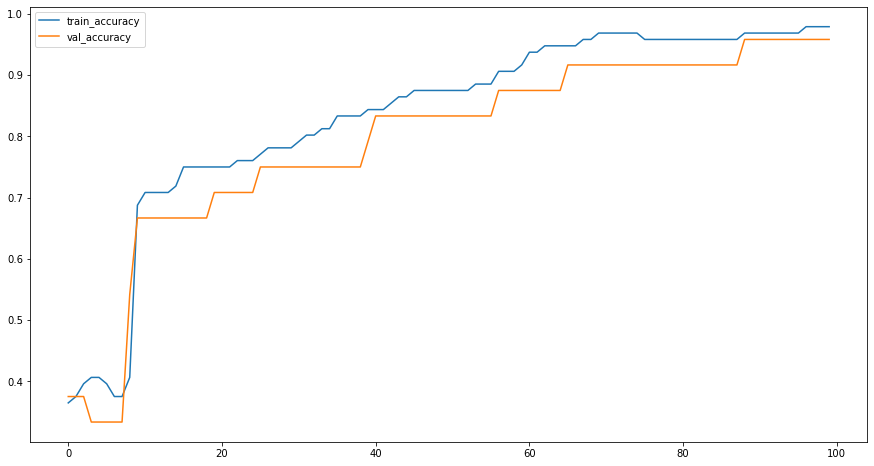

In [85]:
plt.figure(figsize=(15, 8))
plt.plot(his.epoch, his.history['accuracy'], label='train_accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [87]:
lossv, accv=irisModel.evaluate(x_test, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 0.1910 - accuracy: 0.9667


In [89]:
lossv, accv

(0.19097691774368286, 0.9666666388511658)

## [4] 모델 저장

In [93]:
M_FILE='irisModel.h5'
W_FILE='irisWeight.h5'

In [94]:
if accv>=0.9:
    save_model(irisModel, M_FILE)
    irisModel.save_weights(W_FILE)

## [5] 복원
---
- 모델 또는 가중치 복원
- load_model(모델 파일 또는 모델 폴더명)
- Sequential.load_weights(가중치 파일 또는 폴더명)

### [5-1] 모델 복원

In [96]:
reModel=load_model(M_FILE)

In [97]:
reModel.evaluate(x_test, y_test)

1/1 [==============================] - 0s 151ms/step - loss: 0.1910 - accuracy: 0.9667


[0.19097691774368286, 0.9666666388511658]

In [98]:
reModel.summary()

Model: "iris"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 30)                330       
                                                                 
 dense_11 (Dense)            (None, 3)                 93        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable params: 0
_________________________________________________________________


In [101]:
# 모델 구조 구성
newModel=Sequential(name='new_iris')
newModel.add(Dense(10, activation='relu', input_shape=(2, )))
newModel.add(Dense(30, activation='relu'))
newModel.add(Dense(3, activation='softmax'))
newModel.summary()

Model: "new_iris"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                30        
                                                                 
 dense_19 (Dense)            (None, 30)                330       
                                                                 
 dense_20 (Dense)            (None, 3)                 93        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable params: 0
_________________________________________________________________


In [102]:
# 모델 생성
newModel.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics='accuracy')

In [103]:
# 가중치 로딩
newModel.load_weights(W_FILE)

In [104]:
newModel.evaluate(x_test, y_test)

1/1 [==============================] - 0s 239ms/step - loss: 0.1910 - accuracy: 0.9667


[0.19097691774368286, 0.9666666388511658]

과적합을 없애기 제일 쉬운 것 : Dropout,
    세밀하게 조정 : 규제,
        배치 정규화